This notebook visualizes weights of chosen neurons to other neurons in the network with pretty Gadfly plots


In [1]:
using NeuralNets
net = buildnet();

In [2]:
# choose neurons to inspect
center10 = sub2ind([10,10],[5,5])
center30 = sub2ind([30,30],[15,15])
br30 = sub2ind([30,30],[23,23])
ul30 = sub2ind([30,30],[1,1])
chosen = ["P_L"=>center10,"LGN_C2"=>br30];
#V1_4"=>ul30, "V1_4"=>center30, 
#chosen = ["V1_5"=>center30];
type_filter = EXC # only visualize excitatory connections

1

In [3]:
# initialize image maps
W = Dict()
name2idx = Dict()
for (li,layer) in enumerate(net.l)
    W[li] = zeros(layer.N)
    name2idx[layer.name] = li
end

for (layerName, neuron_idx) in chosen
    li=name2idx[layerName]

    for pre_conn in net.pre[li]    # for each presynaptic layer to this neuron's layer
        s_idx = pre_conn.s # index of source layer
        if s_idx != li # only visualize recurrent weights in post_conns
            for syn in pre_conn.synapses # find all neurons that connect to this one
                if syn.t == neuron_idx && syn.stype == type_filter #
                    W[s_idx][syn.s] += syn.w 
                end
            end
            
        end
    end
    
    for post_conn in net.post[li]
        t_idx = post_conn.t
        for syn in post_conn.synapses
            if syn.s == neuron_idx && syn.stype == type_filter
                W[t_idx][syn.t] += syn.w
            end
        end
    end
    
    W[li][neuron_idx]=.1
end

In [4]:
using Gadfly

In [5]:
set_default_plot_size(22cm, 22cm)

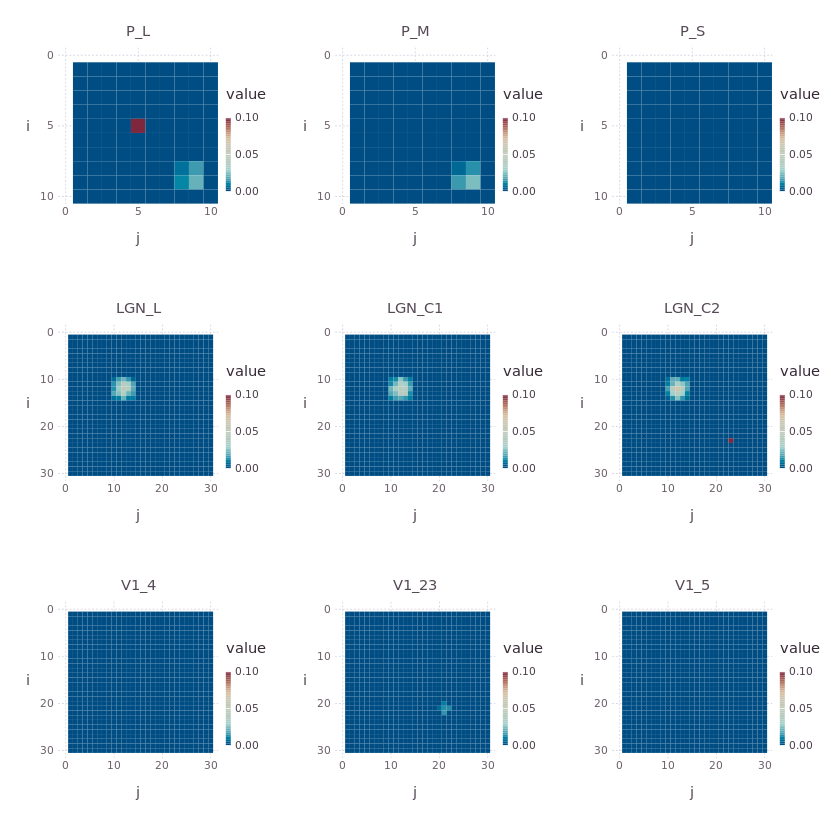

In [6]:
pp = Plot[]
for li=1:length(net.l)
    layer = net.l[li]
    N = layer.N
    width = int(sqrt(N))
    data = reshape(W[li],width,width)
    data[data .== 0] = 1e-10
    p = spy(data,
    Scale.x_continuous(minvalue=0, maxvalue=width),
    Scale.y_continuous(minvalue=0, maxvalue=width),
    Scale.color_continuous(minvalue=0,maxvalue=.1),
    Guide.title(layer.name))
    push!(pp,p)
end
# this is the best guess I have at making subplots
vstack(hstack(pp[1:3]),hstack(pp[4:6]),hstack(pp[7:9]))

As shown in the above activation maps, a center stimulated neuron at P_L drives the corresponding topographic locations in the LGN, and a driven neuron in LGN_C2 drives a forward projection in V1_23 and is connected to P_L and P_M as presynaptic inputs.